# A Gospel in the Language of Lies
### Interactive Figures and Data Appendix

In [1]:
# import statements
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os

#### Download the data from GitHub

If spreadsheets are more your style, you can also [import this CSV](https://github.com/cwf2/homerocentones/blob/main/data/leave_one_out.csv) directly into Excel.

In [2]:
data_path = 'https://raw.githubusercontent.com/cwf2/homerocentones/main/data/leave_one_out.csv'
df = pd.read_csv(data_path, na_values=[''], keep_default_na=False)

# relabel lines of unknown source
df['hom_work'] = df['hom_work'].replace('0', np.NaN)
df['hom_spkr_being'] = df['hom_spkr_being'].replace('0', np.NaN)

# make deception tags ordered categorical values
df['dec_line'] = pd.Categorical(df['dec_line'],
    categories = ['unclassified', 'None', 'Possible', 'Strong'], ordered=True)
df['dec_speech'] = pd.Categorical(df['dec_speech'],
    categories = ['unclassified', 'None', 'Possible', 'Strong'], ordered=True)

#### General style settings

In [3]:
sns.set_style('white')
pal = reversed(sns.color_palette('hls')[:4])

#### Source lines for Eudocia by work

A little more than half of Eudocia's source lines come from the *Odyssey*, with fewer coming from the *Iliad*.

Note: In the pie charts below, we have counted lines that occur more than once in Homer proportionally: if the same line occurs, for example, twice in the *Odyssey* and once in the *Iliad*, then each occurrence will be counted as one-third of a line, so that the total for *Odyssey* is 0.67 and that for the *Iliad* is 0.33.

In [4]:
# summary table

lines_by_work = df.groupby('hom_work').agg(
    lines = ('coefficient.1', 'sum'),
)

display(lines_by_work)

,lines
hom_work,
Il.,451.08
Od.,595.71


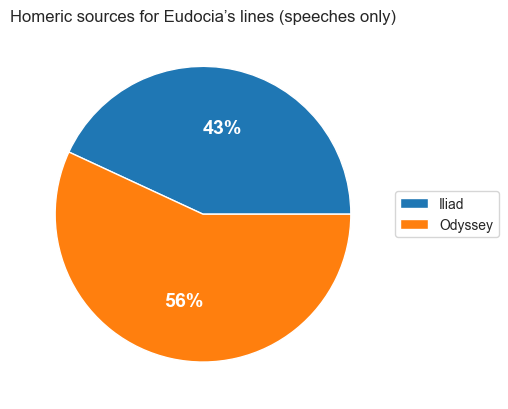

In [38]:
# pie chart
fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x = lines_by_work['lines'], 
    labels=['Iliad', 'Odyssey'], 
    labeldistance=None,
    autopct='%d%%',
)

ax.legend(loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Homeric sources for Eudocia’s lines (speeches only)')
plt.setp(autotexts, size=14, weight="bold", color="white")

# save figure as PDF
output_file = os.path.join('output', 'fig_source_by_work.pdf')
plt.savefig(output_file)

# display
plt.show()

#### By Homeric source speaker 

In [42]:
# simplified list of characters
spkrs = df['hom_spkr_being'].copy()
spkrs[spkrs=='mortal'] = 'other mortals'
spkrs[spkrs=='divine'] = 'gods'
spkrs[spkrs=='Narrator'] = 'narrator'

for name in ['Odysseus', 'Achilles', 'Telemachus', 'Penelope',]:
    mask = df['hom_spkr'].str.startswith(name)
    spkrs[mask] = name

In [98]:
# summary table
lines_by_hom_spkr = df.groupby(spkrs).agg(
    lines = ('coefficient.1', 'sum'),
)

# reorder
order = ['Odysseus', 'Achilles', 'Telemachus', 'Penelope', 'narrator', 'other mortals', 'gods', 'other']
lines_by_hom_spkr = lines_by_hom_spkr.loc[order, :]

display(lines_by_hom_spkr)

,lines
hom_spkr_being,
Odysseus,195.06
Achilles,62.03
Telemachus,52.99
Penelope,56.89
narrator,46.91
other mortals,485.62
gods,135.09
other,12.20


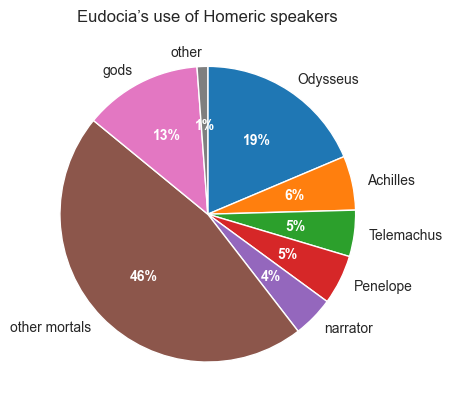

In [99]:
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    x = lines_by_hom_spkr['lines'],
    labels = order,
    counterclock = False,
    startangle = 90,
    autopct='%1.f%%',
)
ax.set_title('Eudocia’s use of Homeric speakers')
plt.setp(autotexts, size=10, weight="bold", color="white")

# save figure as PDF
output_file = os.path.join('output', 'fig_source_by_hom_spkr.pdf')
plt.savefig(output_file)

plt.show()

#### Homer's lines in disguise

#### Eudocia's use of lines in disguise

In [63]:
# table: disguised or not
disg_mask = df['hom_spkr'].str.contains('-')

is_disg = df.groupby(disg_mask).agg(
    lines = ('coefficient.1', 'sum'),
)

display(is_disg)

,lines
hom_spkr,
False,953.18
True,95.61


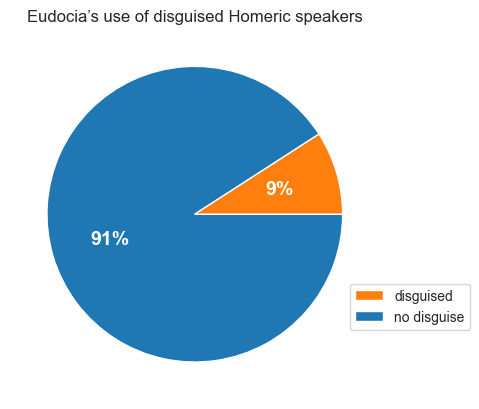

In [148]:
# pie chart
fig, ax  = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x = is_disg['lines'],
    labels = ['no disguise', 'disguised'],
    labeldistance = None,
    counterclock = False,
    autopct = '%1.f%%',
)
ax.set_title('Eudocia’s use of disguised Homeric speakers')
ax.legend(loc='center left', bbox_to_anchor=(0.9, 0, 1, 0.5), reverse=True)
plt.setp(autotexts, size=14, weight="bold", color="white")

# save figure as PDF
output_file = os.path.join('output', 'fig_is_disg.pdf')
plt.savefig(output_file)

plt.show()

In [100]:
# table: disguised characters 
by_disg = df.loc[disg_mask].groupby('hom_spkr').agg(
    lines = ('coefficient.1', 'sum'),
).sort_index()

order = [
    'Odysseus-beggar',
    'Odysseus-stranger',
    'Athena-Mentor',
    'Athena-Mentes',
    'Athena-maiden',
    'Athena-herald',
    'Athena-companion of Nausicaa',
    'Hermes-young man',
    'Poseidon-Calchas',
    'dream-Iphthime',
    'dream-Nestor',]
by_disg = by_disg.loc[order, :]

display(by_disg)

,lines
hom_spkr,
Odysseus-beggar,59.40
Odysseus-stranger,0.53
Athena-Mentor,10.50
Athena-Mentes,3.62
Athena-maiden,5.00
Athena-herald,2.00
Athena-companion of Nausicaa,2.00
Hermes-young man,4.06
Poseidon-Calchas,2.50


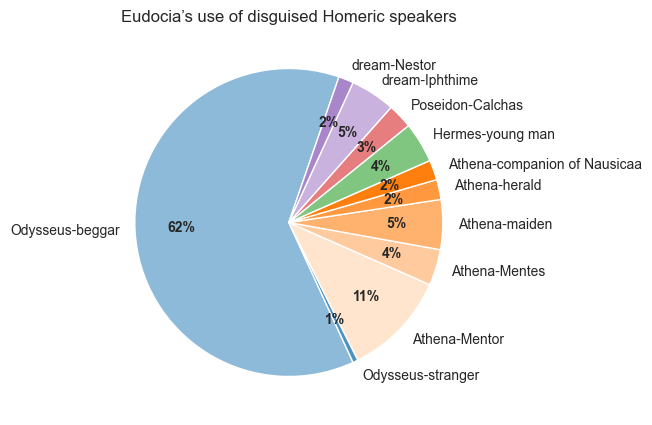

In [156]:
# bar chart
colors = ['tab:blue', 'tab:blue', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:purple']
alphas = [0.5, 0.8, 0.2, 0.4, 0.6, 0.8, 1, 0.6, 0.6, 0.5, 0.8]

fig, ax  = plt.subplots(figsize=(8,5))

wedges, texts, autotexts = ax.pie(
    x = by_disg['lines'],
    labels = by_disg.index,
    colors = zip(colors, alphas),
    counterclock = True,
    startangle = 71,
    autopct = '%1.f%%',
    pctdistance = 0.7,
)

ax.set_title('Eudocia’s use of disguised Homeric speakers')
plt.setp(autotexts, size=10, weight="bold")

# save figure as PDF
output_file = os.path.join('output', 'fig_by_disg.pdf')
plt.savefig(output_file)

plt.show()

In [ ]:
x = df.loc[is_disg].groupby('hom_spkr').agg(
    lines = ('coefficient.1', 'sum'),
).sort_index()

fig, ax = plt.subplots()
ax.pie(x['lines'], labels=x.index)
ax.set_title('lines spoken in disguise')

plt.show()

In [ ]:
df.groupby(['eud_line', 'segment']).agg(
    eud_seq = ('eud_seq', 'first'),
    n_segs = ('line-with-segments', 'first'),
    eud_spkr = ('eud_spkr', 'first'),
    eud_addr = ('eud_addr_all', 'first'),
    deceptive_line = ('dec_line', 'max'),
    deceptive_speech = ('dec_speech', 'max'),
)

In [ ]:
x = df.loc[df['eud_seq']==1]
pd.crosstab(x['eud_line'], x['deceptive_speech'], normalize='index').sum().plot.pie()
    
        

In [ ]:
def plotEudociaSpeech(seq, filename=None):
    sns.catplot(
        data = df.loc[df['eud_seq']==seq], 
        x = 'eud_line', 
        y = 'hom_spkr', 
        hue = 'dec_line', 
        kind = 'swarm',
        palette = pal,
        aspect = 1.4,
    )
    if filename is not None:
        plt.savefig(filename)
    plt.show()

In [ ]:
plotEudociaSpeech(83)

In [ ]:
sns.catplot(
        data = df, 
        x = 'eud_line', 
        y = 'eud_spkr', 
        hue = 'dec_speech', 
        kind = 'strip',
        #palette = pal,
        #aspect = 2.5,
    )
#plt.savefig('foo.pdf')

In [ ]:
valid_names = df.loc[df['dec_speech'].isin(['Strong']), 'eud_spkr'].unique()

sns.catplot(
        data = df.loc[df['eud_spkr'].isin(valid_names)], 
        x = 'eud_line', 
        y = 'eud_spkr', 
        hue = 'dec_speech', 
        kind = 'strip',
        #palette = pal,
        aspect = 2.5,
    )